In [27]:

import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

%matplotlib inline

tf.__version__

'2.5.0'

## Loading Cifar10

In [15]:
class_name = ['airplane',	'automobile',	'bird',	'cat', 'deer', 'dog',
'frog', 'horse', 'ship', 'truck']

In [16]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [18]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Preprocessing

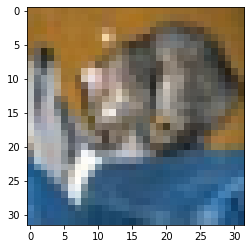

In [17]:
plt.imshow(X_test[0])

In [13]:
X_train = X_train / 225.0
X_test  = X_test / 225.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


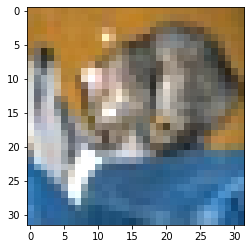

In [14]:
plt.imshow(X_test[0])

## Creating the model


**Relu**: is an activation function, mostly used in CNN architectures. It leaves the input number as it is if it is more significant than zero, otherwise the output is zero.

In [40]:
model = Sequential()

# input_shape (batch_size, weight, high, channel) only for layer 1
# padding: same (add 0) => same size?
# padding: valid (don't add 0 => lose information)
model.add(Conv2D(filters=32, kernel_size=3, padding="Same",
                 activation="relu", input_shape=[32, 32, 3]))

model.add(Conv2D(filters=32, kernel_size=3, padding="Same",
                 activation="relu"))

model.add(Conv2D(filters=32, kernel_size=3, padding="Same",
                 activation="relu"))

model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))

model.add(Conv2D(filters=64, kernel_size=3, padding="Same",
                 activation="relu"))

model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics= ['sparse_categorical_accuracy'] )

model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)            

In [41]:
model.fit(X_train, y_train, epochs=1)

1563/1563 [==============================] - 281s 179ms/step - loss: 1.5174 - sparse_categorical_accuracy: 0.4888


In [42]:
model.fit(X_train, y_train, epochs=1)

1563/1563 [==============================] - 279s 178ms/step - loss: 1.0185 - sparse_categorical_accuracy: 0.6464


In [43]:
model.fit(X_train, y_train, epochs=4)

Epoch 1/4
1563/1563 [==============================] - 279s 179ms/step - loss: 0.8751 - sparse_categorical_accuracy: 0.6966
Epoch 2/4
1563/1563 [==============================] - 279s 179ms/step - loss: 0.7710 - sparse_categorical_accuracy: 0.7314
Epoch 3/4
1563/1563 [==============================] - 278s 178ms/step - loss: 0.6798 - sparse_categorical_accuracy: 0.7636
Epoch 4/4
1563/1563 [==============================] - 278s 178ms/step - loss: 0.6029 - sparse_categorical_accuracy: 0.7881


In [44]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 13s 43ms/step - loss: 0.9494 - sparse_categorical_accuracy: 0.6955
